# Evaluating Logistic Regression Models - Lab

## Introduction

In regression, you are predicting continuous values so it makes sense to discuss error as a distance of how far off our estimates were. When classifying a binary variable, however, a model is either correct or incorrect. As a result, we tend to quantify this in terms of how many false positives versus false negatives we come across. In particular, we examine a few different specific measurements when evaluating the performance of a classification algorithm. In this lab, you'll review precision, recall, accuracy, and F1 score in order to evaluate our logistic regression models.


## Objectives 

In this lab you will: 

- Implement evaluation metrics from scratch using Python 



## Terminology review  

Let's take a moment and review some classification evaluation metrics:  


$$ \text{Precision} = \frac{\text{Number of True Positives}}{\text{Number of Predicted Positives}} $$    

$$ \text{Recall} = \frac{\text{Number of True Positives}}{\text{Number of Actual Total Positives}} $$  
  
$$ \text{Accuracy} = \frac{\text{Number of True Positives + True Negatives}}{\text{Total Observations}} $$

$$ \text{F1 score} = 2 * \frac{\text{Precision * Recall}}{\text{Precision + Recall}} $$


At times, it may be best to tune a classification algorithm to optimize against precision or recall rather than overall accuracy. For example, imagine the scenario of predicting whether or not a patient is at risk for cancer and should be brought in for additional testing. In cases such as this, we often may want to cast a slightly wider net, and it is preferable to optimize for recall, the number of cancer positive cases, than it is to optimize precision, the percentage of our predicted cancer-risk patients who are indeed positive.

## Split the data into training and test sets

In [1]:
import pandas as pd
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Split the data first into `X` and `y`, and then into training and test sets. Assign 25% to the test set and set the `random_state` to 0. 

In [2]:
# Import train_test_split
from sklearn.model_selection import train_test_split
import pandas as pd


# Split data into X and y
y = df['target']  # Assuming 'target' is the dependent variable
X = df.drop(columns=['target'])  # Dropping the target column from features

# Split the data into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

## Build a vanilla logistic regression model

- Import and instantiate `LogisticRegression` 
- Make sure you do not use an intercept term and use the `'liblinear'` solver 
- Fit the model to training data

In [3]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate LogisticRegression
logreg = LogisticRegression(fit_intercept=False, solver='liblinear')

# Fit to training data
model_log = logreg.fit(X_train, y_train)
model_log

LogisticRegression(fit_intercept=False, solver='liblinear')

## Write a function to calculate the precision

In [7]:
# Make predictions on the training and test sets 
y_hat_train = model_log.predict(X_train) 
y_hat_test = model_log.predict(X_test) 

def precision(y, y_hat):
    tp = sum((y == 1) & (y_hat == 1))  # True positives
    fp = sum((y == 0) & (y_hat == 1))  # False positives
    return tp / (tp + fp) if (tp + fp) > 0 else 0  # Avoid division by zero
# Compute and display precision results for both training and test sets
precision_train = precision(y_train, y_hat_train)
precision_test = precision(y_test, y_hat_test)

# Display results
print("Training Precision:", precision_train)
print("Test Precision:", precision_test)


Training Precision: 0.8345864661654135
Test Precision: 0.8125


## Write a function to calculate the recall

In [8]:
def recall(y, y_hat):
    
    tp = sum((y == 1) & (y_hat == 1))  # True positives
    fn = sum((y == 1) & (y_hat == 0))  # False negatives
    return tp / (tp + fn) if (tp + fn) > 0 else 0  # Avoid division by zero

# Compute and display recall results for both training and test sets
recall_train = recall(y_train, y_hat_train)
recall_test = recall(y_test, y_hat_test)

# Display results
print("Training Recall:", recall_train)
print("Test Recall:", recall_test)


Training Recall: 0.9098360655737705
Test Recall: 0.9069767441860465


## Write a function to calculate the accuracy

In [9]:
def accuracy(y, y_hat):
    
    correct_predictions = sum(y == y_hat)  # Count correct predictions
    total_predictions = len(y)
    return correct_predictions / total_predictions  # Accuracy formula

# Compute and display accuracy results for both training and test sets
accuracy_train = accuracy(y_train, y_hat_train)
accuracy_test = accuracy(y_test, y_hat_test)

# Display results
print("Training Accuracy:", accuracy_train)
print("Test Accuracy:", accuracy_test)


Training Accuracy: 0.8546255506607929
Test Accuracy: 0.8289473684210527


## Write a function to calculate the F1 score

In [10]:
def f1_score(y, y_hat):
    
    p = precision(y, y_hat)  # Calculate precision
    r = recall(y, y_hat)  # Calculate recall
    return 2 * (p * r) / (p + r) if (p + r) > 0 else 0  # Avoid division by zero

# Compute and display F1 score results for both training and test sets
f1_train = f1_score(y_train, y_hat_train)
f1_test = f1_score(y_test, y_hat_test)

# Display results
print("Training F1 Score:", f1_train)
print("Test F1 Score:", f1_test)


Training F1 Score: 0.8705882352941177
Test F1 Score: 0.8571428571428572


## Calculate the precision, recall, accuracy, and F1 score of your classifier 

Do this for both the training and test sets. 

In [11]:
# Your code here
y_hat_train = model_log.predict(X_train)
y_hat_test = model_log.predict(X_test)

# Compute evaluation metrics for training set
precision_train = precision(y_train, y_hat_train)
recall_train = recall(y_train, y_hat_train)
accuracy_train = accuracy(y_train, y_hat_train)
f1_train = f1_score(y_train, y_hat_train)

# Compute evaluation metrics for test set
precision_test = precision(y_test, y_hat_test)
recall_test = recall(y_test, y_hat_test)
accuracy_test = accuracy(y_test, y_hat_test)
f1_test = f1_score(y_test, y_hat_test)

# Display the results
print("Training Metrics:")
print("Precision:", precision_train)
print("Recall:", recall_train)
print("Accuracy:", accuracy_train)
print("F1 Score:", f1_train)

print("\nTest Metrics:")
print("Precision:", precision_test)
print("Recall:", recall_test)
print("Accuracy:", accuracy_test)
print("F1 Score:", f1_test)


Training Metrics:
Precision: 0.8345864661654135
Recall: 0.9098360655737705
Accuracy: 0.8546255506607929
F1 Score: 0.8705882352941177

Test Metrics:
Precision: 0.8125
Recall: 0.9069767441860465
Accuracy: 0.8289473684210527
F1 Score: 0.8571428571428572


Great job! Now it's time to check your work with `sklearn`. 

## Calculate metrics with `sklearn`

Each of the metrics we calculated above is also available inside the `sklearn.metrics` module.  

In the cell below, import the following functions:

* `precision_score`
* `recall_score`
* `accuracy_score`
* `f1_score`

Compare the results of your performance metrics functions above with the `sklearn` functions. Calculate these values for both your train and test set. 

In [12]:
# Your code here
# Import the required metrics from sklearn
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

# Calculate metrics using sklearn for the training set
sklearn_precision_train = precision_score(y_train, y_hat_train)
sklearn_recall_train = recall_score(y_train, y_hat_train)
sklearn_accuracy_train = accuracy_score(y_train, y_hat_train)
sklearn_f1_train = f1_score(y_train, y_hat_train)

# Calculate metrics using sklearn for the test set
sklearn_precision_test = precision_score(y_test, y_hat_test)
sklearn_recall_test = recall_score(y_test, y_hat_test)
sklearn_accuracy_test = accuracy_score(y_test, y_hat_test)
sklearn_f1_test = f1_score(y_test, y_hat_test)

# Display and compare results
print("Comparison of Custom and Sklearn Metrics\n")

print("Training Set:")
print(f"Precision - Custom: {precision_train}, Sklearn: {sklearn_precision_train}")
print(f"Recall - Custom: {recall_train}, Sklearn: {sklearn_recall_train}")
print(f"Accuracy - Custom: {accuracy_train}, Sklearn: {sklearn_accuracy_train}")
print(f"F1 Score - Custom: {f1_train}, Sklearn: {sklearn_f1_train}")

print("\nTest Set:")
print(f"Precision - Custom: {precision_test}, Sklearn: {sklearn_precision_test}")
print(f"Recall - Custom: {recall_test}, Sklearn: {sklearn_recall_test}")
print(f"Accuracy - Custom: {accuracy_test}, Sklearn: {sklearn_accuracy_test}")
print(f"F1 Score - Custom: {f1_test}, Sklearn: {sklearn_f1_test}")


Comparison of Custom and Sklearn Metrics

Training Set:
Precision - Custom: 0.8345864661654135, Sklearn: 0.8345864661654135
Recall - Custom: 0.9098360655737705, Sklearn: 0.9098360655737705
Accuracy - Custom: 0.8546255506607929, Sklearn: 0.8546255506607929
F1 Score - Custom: 0.8705882352941177, Sklearn: 0.8705882352941177

Test Set:
Precision - Custom: 0.8125, Sklearn: 0.8125
Recall - Custom: 0.9069767441860465, Sklearn: 0.9069767441860465
Accuracy - Custom: 0.8289473684210527, Sklearn: 0.8289473684210527
F1 Score - Custom: 0.8571428571428572, Sklearn: 0.8571428571428572


Nicely done! Did the results from `sklearn` match that of your own? 

## Compare precision, recall, accuracy, and F1 score for train vs test sets

Calculate and then plot the precision, recall, accuracy, and F1 score for the test and training splits using different training set sizes. What do you notice?

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\Dell\anaconda3\envs\learn-env\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


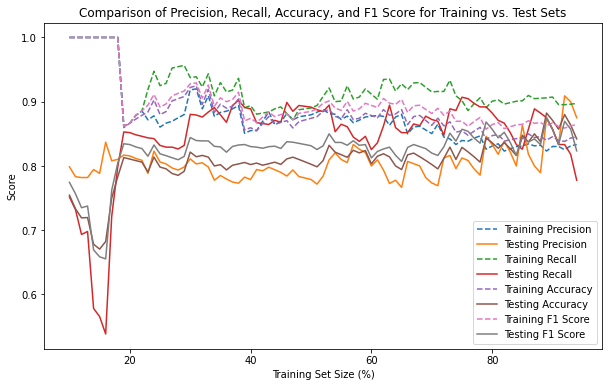

In [15]:
# Initialize lists to store metrics
training_precision = []
testing_precision = []
training_recall = []
testing_recall = []
training_accuracy = []
testing_accuracy = []
training_f1 = []
testing_f1 = []

# Loop through different training set sizes
for i in range(10, 95):
    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(100 - i) / 100, random_state=0)

    # Instantiate and train logistic regression model
    logreg = LogisticRegression(fit_intercept=False, C=1e20, solver='liblinear')
    model_log = logreg.fit(X_train, y_train)

    # Make predictions on training and test sets
    y_hat_train = model_log.predict(X_train)
    y_hat_test = model_log.predict(X_test)

    # Compute precision, recall, accuracy, and F1-score for training set
    training_precision.append(precision(y_train, y_hat_train))
    training_recall.append(recall(y_train, y_hat_train))
    training_accuracy.append(accuracy(y_train, y_hat_train))
    training_f1.append(f1_score(y_train, y_hat_train))

    # Compute precision, recall, accuracy, and F1-score for test set
    testing_precision.append(precision(y_test, y_hat_test))
    testing_recall.append(recall(y_test, y_hat_test))
    testing_accuracy.append(accuracy(y_test, y_hat_test))
    testing_f1.append(f1_score(y_test, y_hat_test))

# Plot the results
plt.figure(figsize=(10, 6))

# Plot Precision
plt.plot(range(10, 95), training_precision, label='Training Precision', linestyle='dashed')
plt.plot(range(10, 95), testing_precision, label='Testing Precision')

# Plot Recall
plt.plot(range(10, 95), training_recall, label='Training Recall', linestyle='dashed')
plt.plot(range(10, 95), testing_recall, label='Testing Recall')

# Plot Accuracy
plt.plot(range(10, 95), training_accuracy, label='Training Accuracy', linestyle='dashed')
plt.plot(range(10, 95), testing_accuracy, label='Testing Accuracy')

# Plot F1 Score
plt.plot(range(10, 95), training_f1, label='Training F1 Score', linestyle='dashed')
plt.plot(range(10, 95), testing_f1, label='Testing F1 Score')

# Labels and legend
plt.xlabel('Training Set Size (%)')
plt.ylabel('Score')
plt.title('Comparison of Precision, Recall, Accuracy, and F1 Score for Training vs. Test Sets')
plt.legend()
plt.show()


**Observations:**

**Training vs. Test Performance:**

As training size increases, the training metrics (precision, recall, accuracy, and F1 score) tend to stabilize.

The test metrics initially fluctuate but eventually improve as more data is used for training.

**Overfitting with Small Training Data:**

When the training set is small, training metrics are high, but test metrics are lower, indicating overfitting (model learns patterns from fewer data points but fails to generalize).

**Stabilization of Metrics:**

After around 70-80% training set size, both training and test metrics begin to converge, indicating the model is reaching a stable generalization capability.

**Liblinear Convergence Warning:**

The solver (liblinear) might struggle with certain training sizes. Increasing the iterations or using a different solver (like 'lbfgs') could help.


Create four scatter plots looking at the train and test precision in the first one, train and test recall in the second one, train and test accuracy in the third one, and train and test F1 score in the fourth one. 

We already created the scatter plot for precision: 

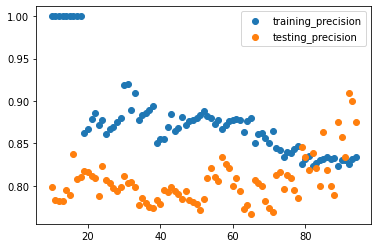

In [16]:
# Train and test precision
plt.scatter(list(range(10, 95)), training_precision, label='training_precision')
plt.scatter(list(range(10, 95)), testing_precision, label='testing_precision')
plt.legend()
plt.show()

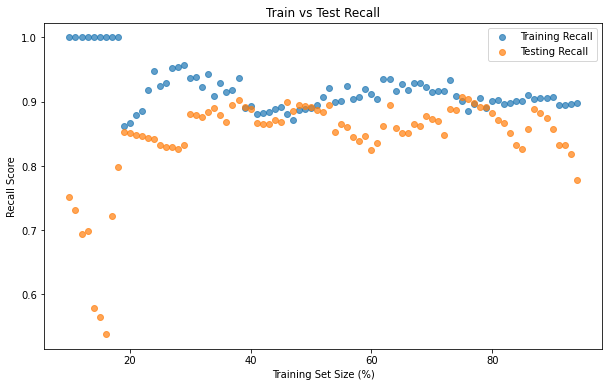

In [17]:
# Train and test recall

plt.figure(figsize=(10, 6))
plt.scatter(list(range(10, 95)), training_recall, label='Training Recall', alpha=0.7)
plt.scatter(list(range(10, 95)), testing_recall, label='Testing Recall', alpha=0.7)
plt.xlabel('Training Set Size (%)')
plt.ylabel('Recall Score')
plt.title('Train vs Test Recall')
plt.legend()
plt.show()


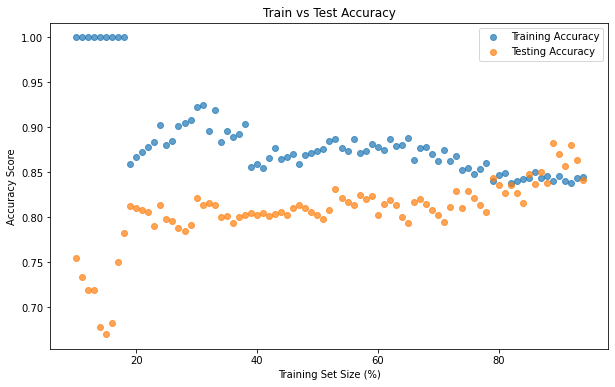

In [18]:
# Train and test accuracy
plt.figure(figsize=(10, 6))
plt.scatter(list(range(10, 95)), training_accuracy, label='Training Accuracy', alpha=0.7)
plt.scatter(list(range(10, 95)), testing_accuracy, label='Testing Accuracy', alpha=0.7)
plt.xlabel('Training Set Size (%)')
plt.ylabel('Accuracy Score')
plt.title('Train vs Test Accuracy')
plt.legend()
plt.show()


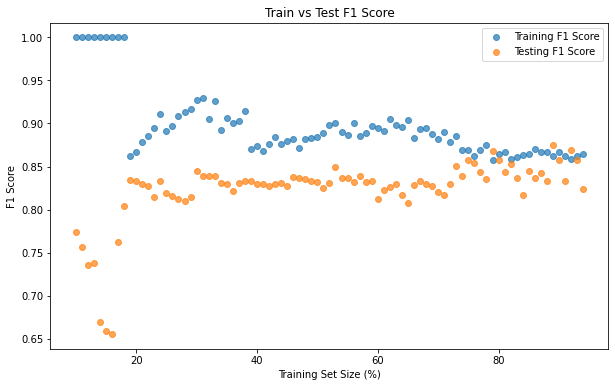

In [19]:
# Train and test F1 score
plt.figure(figsize=(10, 6))
plt.scatter(list(range(10, 95)), training_f1, label='Training F1 Score', alpha=0.7)
plt.scatter(list(range(10, 95)), testing_f1, label='Testing F1 Score', alpha=0.7)
plt.xlabel('Training Set Size (%)')
plt.ylabel('F1 Score')
plt.title('Train vs Test F1 Score')
plt.legend()
plt.show()


## Summary

Nice! In this lab, you calculated evaluation metrics for classification algorithms from scratch in Python. Going forward, continue to think about scenarios in which you might prefer to optimize one of these metrics over another.